In [ ]:
# Catalina Savage
# AST 5263 - Advanced Observational Astronomy
# Homework 4

In [15]:
import importlib as im

In [20]:
# im.import_module( "astropy.coordinates" )

In [1]:
import numpy             as np
import matplotlib.pyplot as plt

import astropy.units as u

from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun #, FK5
# /home/savage/pc/anaconda3/Lib/site-packages/astropy/coordinates/tests/test_sky_coord.py

from astropy.time        import Time, TimeGPS

import datetime as dt

ModuleNotFoundError: No module named 'astropy'

In [ ]:
# Question 1

In [2]:
# RA in J2000
ra_A = 14*u.hour + 39*u.minute + 36.5*u.second
ra_B = 14*u.hour + 39*u.minute + 35.1*u.second

# declinations
dec_A = -60*u.degree + 50*u.arcminute + 2*u.arcsecond
dec_B = -60*u.degree + 50*u.arcminute + 15*u.arcsecond

# proper motions, RA
pm_raA = -3.679*( u.arcsecond / u.year )
pm_raB = -3.614*( u.arcsecond / u.year )

# proper motions, declination
pm_decA =  0.474*( u.arcsecond / u.year )
pm_decB = 0.803*( u.arcsecond / u.year )

NameError: name 'u' is not defined

In [3]:
# epochs to use in calculations
epoch = Time( np.linspace(2000,2050,100), format='decimalyear' )

NameError: name 'Time' is not defined

In [13]:
# calculate apparent motions in difference epochs
coord_A = SkyCoord( ra=ra_A,
                    dec=dec_A, 
                    pm_ra_cosdec=pm_raA,
                    pm_dec=pm_decA, 
                    obstime=epoch )

coord_B = SkyCoord( ra=ra_B,
                    dec=dec_B,
                    pm_ra_cosdec=pm_raB,
                    pm_dec=pm_decB, 
                    obstime=epoch )

NameError: name 'SkyCoord' is not defined

In [5]:
sep        = coord_A.separation( coord_B )
sep_argmin = np.argmin( sep )

In [6]:
sep_epoch = epoch[ sep_argmin ]
sep_min  = sep.min()
# sep_min2  = np.min( sep )

In [7]:
sep_arcsec = sep_min.to( u.arcsecond )
# sep_arcsec2 = sep_min2.to( u.arcsecond )

In [8]:
print( 'Epoch of minimal separation: ', sep_epoch )
print( 'Minimum separation in arcseconds:', sep_arcsec )
# print( 'Minimum separation in arcseconds:', sep_arcsec2 )

Epoch of minimal separation:  2000.0
Minimum separation in arcseconds: 16.878 arcsec


In [ ]:
# Question 2

In [9]:
# t = np.arange( 1582,10000.1 )
t = np.linspace( 1582,10000 )

t_1 = t - 1580
t_2 = t - 1600
t_3 = t - 1582

In [10]:
t_leap = t_1//4 - t_2//100 + t_2//400

In [11]:
days_cnt  = t_3*365 + t_leap
days_trop = t_3*365.24219

In [12]:
# offset
tau = days_cnt - days_trop
print( tau )

[ 0.          0.39274653 -0.21450694  1.17823959  0.57098612  0.96373265
  0.35647918  0.74922571  1.14197224  0.53471878  0.92746531  0.32021184
  0.71295837  0.1057049   0.49845143  0.89119796  0.28394449  0.67669102
  1.06943755  1.46218408  0.85493061  1.24767714  1.64042367  1.0331702
  1.42591673  1.81866327  2.2114098   1.60415633  1.99690286  2.38964939
  0.78239592  1.17514245  1.56788898  1.96063551  1.35338204  1.74612857
  2.1388751   1.53162163  1.92436816  2.31711469  2.70986122  2.10260775
  2.49535429  2.88810082  2.28084735  2.67359388  3.06634041  3.45908694
  2.85183347  3.24458   ]


In [ ]:
# ( a )

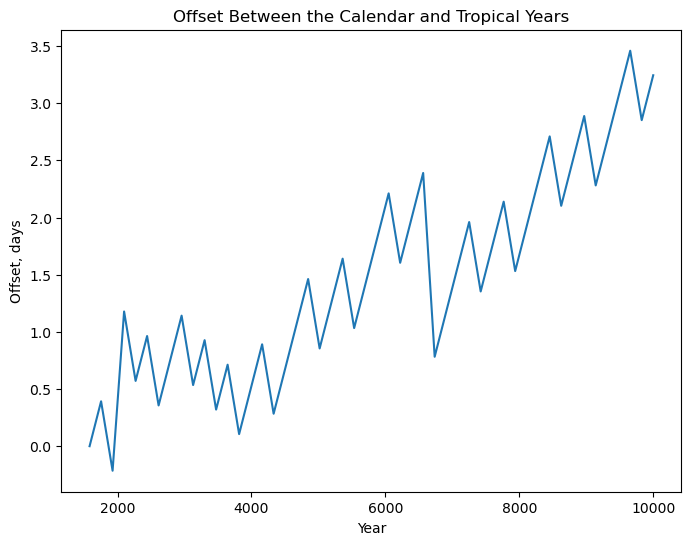

In [13]:
# plot offset as a function of year (??)
plt.figure( figsize=(8,6) )
plt.plot( t, tau )

plt.title( 'Offset Between the Calendar and Tropical Years' )

plt.xlabel( 'Year' )
plt.ylabel( 'Offset, days' )

plt.show()

In [ ]:
# Question 3

In [14]:
az = [ 53, 233 ]

alt_min = 20*u.deg # altitude of sun in sky

lat_psb   = 28.6*u.deg
long_ecl  = 0*u.deg
long_rate =  360*u.deg / 365.25 #*u.day

In [15]:
# psb = EarthLocation( lat=lat_psb, lon=-(180-az[0]), height=0 )
psb = EarthLocation( lat=lat_psb, lon=-(180-az[long_ecl]), height=0 )
# assuming height means elevation above sea-level, FLORIDA IS FLAT AND WILL BE EATEN BY THE OCEAN IN THE FUTURE

TypeError: only integer dimensionless scalar quantities can be converted to a Python index

In [16]:
# array containing number of days in a year
# one_yr = np.arange( 1, 366 )
one_yr = np.linspace( 1, 365 )

In [17]:
long_sun  = long_rate * (one_yr-80) # assign March 20 as Day 0

psb_time  = Time( '2018-02-16 12:00:00', scale='utc' ) + one_yr - 1
psb_altaz = AltAz( obstime=psb_time, location=psb )

NameError: name 'psb' is not defined

In [ ]:
sun_time  = get_sun( psb_time )
sun_altaz = sun_time.transform_to( psb_altaz )

sun_light = sun_altaz.alt.deg > alt_min # or .alt.degree ??
sun_day   = one_yr[ sun_light ]

In [ ]:
print( "Days of direct sunlight in PSB's NW side of the first floor:", sun_day )

In [ ]:
# Question 4

In [ ]:
long_orl  = -81*u.degree + 12*u.arcminute + 0*u.arcsecond
long_gwch =  0*u.degree

ra_star  = 5*u.hour + 27*u.minute + 30.0*u.second
dec_star = 20*u.degree + 0*u.arcminute + 0*u.arcsecond

time_orl  = Time( '2018-02-16 20:04:26', scale='est' )
time_gwch = Time( '2018-02-17 00:00:00', scale='utc' )

In [ ]:
# Question 5

In [6]:
# time_cal = Time( '2018-02-16 23:05:12', scale='utc' )
time_gps = TimeGPS( '2018-02-16 23:05:44', scale='tai' )

In [ ]:
# Question 6